In [1]:
%load_ext autoreload
%autoreload 2

In [11]:
from dataset import PhotoArrayDataset
from model import MLP

from matplotlib import pyplot as plt
import numpy as np
from torch import nn
from torch.utils.data import DataLoader
import torch

In [58]:
model.to("cuda:0")

AssertionError: 
The NVIDIA driver on your system is too old (found version 9010).
Please update your GPU driver by downloading and installing a new
version from the URL: http://www.nvidia.com/Download/index.aspx
Alternatively, go to: https://pytorch.org to install
a PyTorch version that has been compiled with your version
of the CUDA driver.

In [27]:
img_path = "/shed/photo/export/watkins_glen_camping_aug2020/instagram/0003_DSC07470.png"
mode = "HSV"
batch_size = 128
hidden_units = [256] * 4



dataset = PhotoArrayDataset(img_path, mode=mode)
in_units = dataset.tensors["features"].shape[1]
dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True, drop_last=True, num_workers=4)
model = MLP(in_units, hidden_units)
opt = torch.optim.Adam(model.parameters())
loss_func = nn.MSELoss()

In [28]:
n_epochs = 100


for ind_epoch in range(n_epochs):
    losses = []
    for batch in dataloader:
        y_hat = model(batch["features"])
        loss = loss_func(y_hat, batch["pixels"])
        opt.zero_grad()
        loss.backward()
        opt.step()
        losses.append(loss.mean().item())
    mean_loss = np.array(losses).mean()
    print(f"Epoch {ind_epoch + 1:02d} complete - loss: {mean_loss:.2f}")
    

Epoch 01 complete - loss: 1682.88
Epoch 02 complete - loss: 1243.72
Epoch 03 complete - loss: 1154.99
Epoch 04 complete - loss: 1071.43
Epoch 05 complete - loss: 1016.50
Epoch 06 complete - loss: 992.85
Epoch 07 complete - loss: 968.82
Epoch 08 complete - loss: 954.25
Epoch 09 complete - loss: 939.50
Epoch 10 complete - loss: 925.30
Epoch 11 complete - loss: 908.56
Epoch 12 complete - loss: 902.27
Epoch 13 complete - loss: 888.98
Epoch 14 complete - loss: 881.18
Epoch 15 complete - loss: 872.56
Epoch 16 complete - loss: 867.62
Epoch 17 complete - loss: 856.65
Epoch 18 complete - loss: 851.71
Epoch 19 complete - loss: 844.06
Epoch 20 complete - loss: 841.27
Epoch 21 complete - loss: 832.85
Epoch 22 complete - loss: 829.02
Epoch 23 complete - loss: 826.00
Epoch 24 complete - loss: 815.27
Epoch 25 complete - loss: 810.53
Epoch 26 complete - loss: 807.32
Epoch 27 complete - loss: 801.34
Epoch 28 complete - loss: 795.41
Epoch 29 complete - loss: 788.70
Epoch 30 complete - loss: 783.01
Epoch

In [41]:
torch.save({"model_state_dict": model.state_dict()}, "./model_checkpoint.pt")

In [49]:
recon_dataloader = DataLoader(dataset, batch_size=256, shuffle=False, drop_last=False, num_workers=4)

collect_arr = []

for batch in recon_dataloader:
    with torch.no_grad():
        collect_arr.append(model(batch["features"]).detach().numpy())

In [54]:
collect = np.concatenate(collect_arr, axis=0)
collect[:, 0] = np.clip(collect[:, 0], 0, 180)
collect[:, 1] = np.clip(collect[:, 1], 0, 255)
collect[:, 2] = np.clip(collect[:, 2], 0, 255)

collect = collect.reshape(331, 497, 3)
collect = np.round(collect).astype(np.uint8)
collect_rgb = cv2.cvtColor(collect, cv2.COLOR_HSV2RGB)

In [55]:
collect.reshape(331 * 497, -1).max(axis=0)

array([180, 246, 188], dtype=uint8)

In [59]:
model

MLP(
  (net): Sequential(
    (0): Linear(in_features=2, out_features=256, bias=True)
    (1): ReLU()
    (2): Linear(in_features=256, out_features=256, bias=True)
    (3): ReLU()
    (4): Linear(in_features=256, out_features=256, bias=True)
    (5): ReLU()
    (6): Linear(in_features=256, out_features=256, bias=True)
    (7): ReLU()
    (8): Linear(in_features=256, out_features=3, bias=True)
  )
)

In [37]:
import cv2

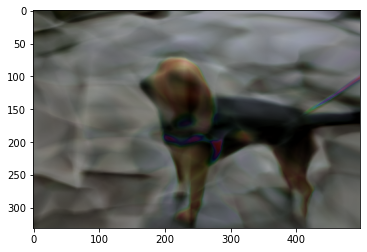

In [56]:
plt.imshow(collect_rgb)

In [40]:
collect_rgb

array([[[   56.19746  , -1153.1031   , -2249.0842   ],
        [   53.01517  , -1101.7378   , -2254.6252   ],
        [   49.962013 , -1042.7372   , -2246.8123   ],
        ...,
        [   23.74987  ,  -800.85754  , -1473.0488   ],
        [   22.418552 ,  -860.2418   , -1462.5078   ],
        [   21.037598 ,  -903.7637   , -1437.7032   ]],

       [[   62.875523 , -1184.9512   , -2220.7346   ],
        [   58.887024 , -1161.232    , -2228.7224   ],
        [   55.15616  , -1124.9086   , -2231.0613   ],
        ...,
        [   21.173836 ,  -801.70886  , -1444.0079   ],
        [   19.82111  ,  -843.433    , -1413.9161   ],
        [   18.468473 ,  -877.15985  , -1375.3446   ]],

       [[   71.591125 , -1107.4169   , -2101.85     ],
        [   67.190605 , -1133.1365   , -2182.3572   ],
        [   62.826603 , -1143.7876   , -2236.6438   ],
        ...,
        [   18.415358 ,  -772.7604   , -1369.683    ],
        [   17.06267  ,  -800.7184   , -1322.5839   ],
        [   15.7099695

In [32]:
collect.shape

(164507, 3)

In [16]:
len(dataloader)

1285

In [24]:
loss.mean().item()

1260.7738037109375